In [1]:
from datetime import datetime

from pathlib import Path

import numpy as np
from scipy.stats import lognorm
import pandas as pd

from astropy import stats
import astropy.units as u
from astropy.io import fits

from matplotlib import style
style.use("seaborn")
style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
#%matplotlib widget

/var/folders/vx/hkwj3_y50fgbdckq7hcv_p000000gn/T/ipykernel_4330/447888227.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn")


In [2]:
rootdir = Path("/Volumes/LaCie 8TB/wfsdat")
# use find to make this csv list
with open(rootdir / "2022_2ndhalf.txt") as f:
    csvs = f.readlines()

# loop through the csv files and read them with pandas
frames = []
for csv in csvs:
    frames.append(pd.read_csv(rootdir / csv.rstrip()))

# now concat each frame into one big frame containing all of the data
data = pd.concat(frames)

In [4]:
g = data.groupby('wfs')
g.wfs.describe()

,count,unique,top,freq
wfs,,,,
binospec,16571,1,binospec,16571
f5,629,1,f5,629
mmirs,1813,1,mmirs,1813
newf9,688,1,newf9,688


In [5]:
# re-calculate the seeing using updated spot FWHM for binospec. filter out any NaN values...
#fixed_list = []
#for wfskey, group in g:
#    wfs = wfs_systems[wfskey]
#    group = g.get_group(wfskey)
#    #group.apply(seeing, axis=1, args=(wfs,))
#    group['fixed_raw_seeing'], group['fixed_seeing'] = seeing(group, wfs)
#    fixed_list.append(group)
#fixed = pd.concat(fixed_list)
#fixed.rename(index=str, columns={"seeing": "orig_seeing", "raw seeing": "orig_raw_seeing"}, inplace=True)
#fixed.rename(index=str, columns={"fixed_seeing": "seeing", "fixed_raw_seeing": "raw seeing"}, inplace=True)
fixed = data[np.isfinite(data['seeing'])]
fixed = fixed[fixed['fwhm'] > 0.]
fixed = fixed[fixed['seeing'] > 0.]
fixed = fixed[fixed['seeing'] < 4.]
#fixed = fixed[fixed['time'] < "2020-12-31"]

In [6]:
fixed.sort_values(by='time')

,time,wfs,file,exptime,airmass,az,el,osst,outt,chamt,...,focerr,cc_x_err,cc_y_err,xcen,ycen,seeing,raw_seeing,fwhm,wavefront_rms,residual_rms
0,2022-06-01T03:24:14.165000,binospec,wfs_ff_cal_img_2022.0601.032414.fits,30.0,1.0856,187.726678,67.093944,14.0,14.3,14.278,...,56.16,-8.726,3.437,275.002942,244.996909,0.774928,0.814072,4.497312,1460.544239,1162.569061
1,2022-06-01T03:24:47.578000,binospec,wfs_ff_cal_img_2022.0601.032447.fits,30.0,1.0857,188.098475,67.077336,14.0,14.3,14.264,...,35.44,-5.779,3.123,274.981506,245.017715,0.869510,0.913483,4.896748,982.072848,1175.626071
2,2022-06-01T03:25:20.917000,binospec,wfs_ff_cal_img_2022.0601.032520.fits,30.0,1.0859,188.470079,67.060105,14.0,14.3,14.257,...,2.24,-1.437,0.925,274.016471,244.983094,0.715476,0.751742,4.245259,317.054964,1096.513398
3,2022-06-01T03:25:54.203000,binospec,wfs_ff_cal_img_2022.0601.032554.fits,30.0,1.0860,188.779134,67.044967,14.0,14.3,14.257,...,-0.00,-0.165,0.779,274.983108,244.022530,0.683845,0.718548,4.110578,207.967218,1198.923132
4,2022-06-01T03:26:27.627000,binospec,wfs_ff_cal_img_2022.0601.032627.fits,30.0,1.0861,189.149622,67.026181,14.0,14.3,14.258,...,-2.35,-0.361,0.000,274.979966,245.006870,0.691394,0.726520,4.142951,248.906887,1189.411353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2022-12-19T13:02:59.395000,binospec,wfs_ff_cal_img_2022.1219.130259.fits,30.0,1.0436,39.098721,73.381235,-1.0,-1.1,-1.045,...,-13.70,0.000,-2.727,255.993572,251.987975,1.083356,1.111455,5.681852,401.297504,1280.749155
748,2022-12-19T13:03:32.545000,binospec,wfs_ff_cal_img_2022.1219.130332.fits,30.0,1.0432,38.886698,73.447260,0.0,-1.0,-1.041,...,-13.62,-0.000,-3.377,253.979335,252.008969,1.111010,1.139563,5.792176,417.330197,1271.090186
749,2022-12-19T13:04:05.790000,binospec,wfs_ff_cal_img_2022.1219.130405.fits,30.0,1.0428,38.633626,73.524926,0.0,-1.0,-1.030,...,1.95,-0.000,-2.252,254.001668,251.993646,1.142620,1.171716,5.918027,205.754939,1241.887137
750,2022-12-19T13:04:38.928000,binospec,wfs_ff_cal_img_2022.1219.130438.fits,30.0,1.0424,38.377786,73.602195,0.0,-1.0,-1.020,...,0.00,-0.630,-1.064,255.012302,251.988747,1.213494,1.244108,6.200029,172.278166,1292.565956


In [7]:
# create a date-time index so we can group and analyze the data by timestamps
fixed = fixed.set_index(pd.DatetimeIndex(fixed['time'], name='ut'))

<Figure size 800x500 with 0 Axes>

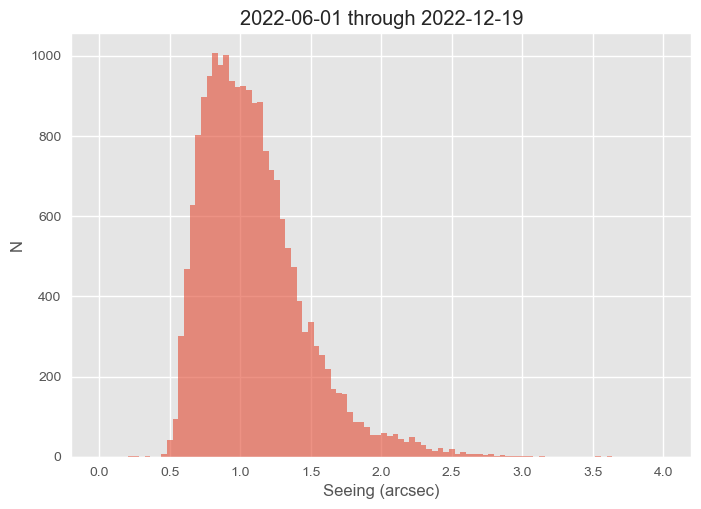

In [8]:
# make raw histogram of the zenith-corrected seeing column
fig = plt.figure(figsize=(8, 5))
fixed.hist(column='seeing', bins=100, range=(0.0, 4.0), alpha=0.6)
with plt.style.context('ggplot'):
    plt.title("2022-06-01 through 2022-12-19")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.show()

In [10]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(fixed['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(fixed['seeing'])
fit_median = exp_mu + loc

0.38688925331194557 0.20377515945314512 0.825485061530143


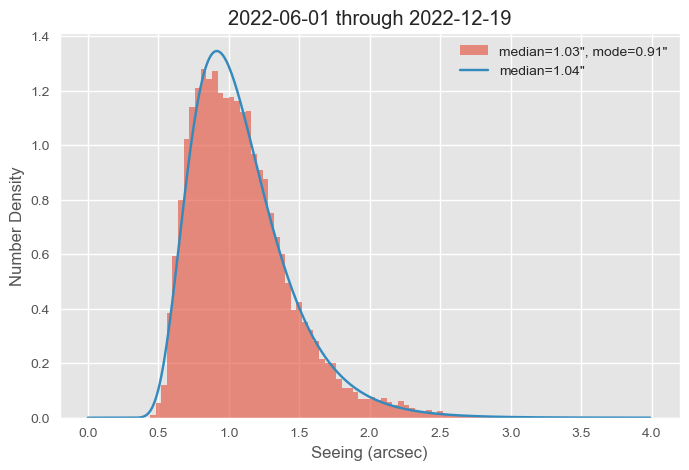

In [18]:
# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(fixed['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("2022-06-01 through 2022-12-19")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2022_2ndhalf.png")
plt.show()

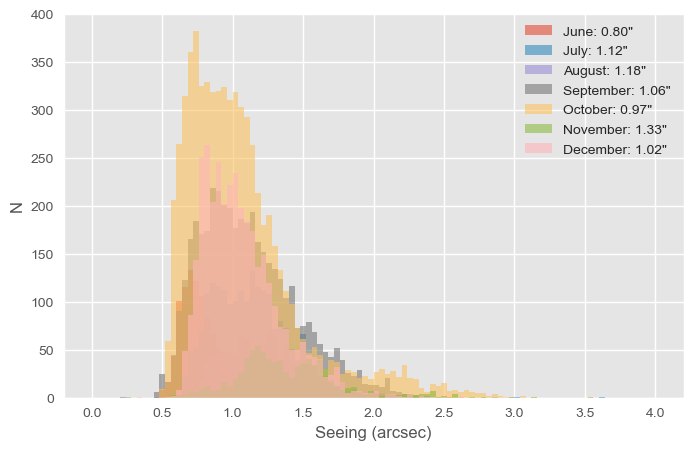

In [17]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
months = {}
legends = []
months['June'] = fixed.loc['2022-06']
months['July'] = fixed.loc['2022-07']
months['August'] = fixed.loc['2022-08']
months['September'] = fixed.loc['2022-09']
months['October'] = fixed.loc['2022-10']
months['November'] = fixed.loc['2022-11']
months['December'] = fixed.loc['2022-12']
for m in months:
    plt.hist(months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2022_2ndhalf_monthly.png")
plt.show()

In [13]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = fixed.between_time(start_time='00:00', end_time='07:00')
second_half = fixed.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

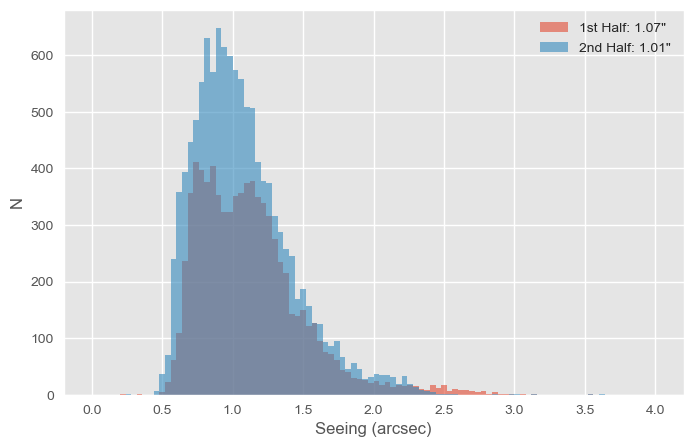

In [16]:
# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2022_2ndhalf_1st_2nd.png")
plt.show()

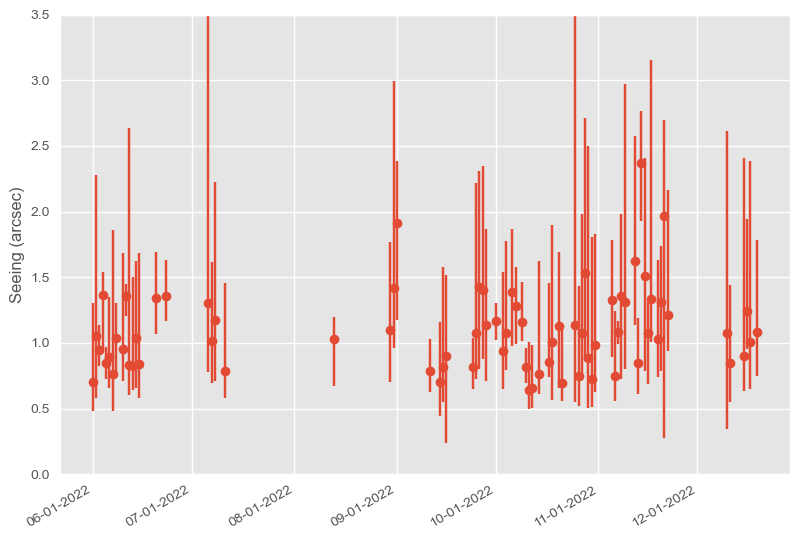

In [19]:
import matplotlib.dates as mdates

# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = fixed.seeing.resample('D').median()
daily['max'] = fixed.seeing.resample('D').max()
daily['min'] = fixed.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2022_2ndhalf_nightly.png")
plt.show()

In [20]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(fixed.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

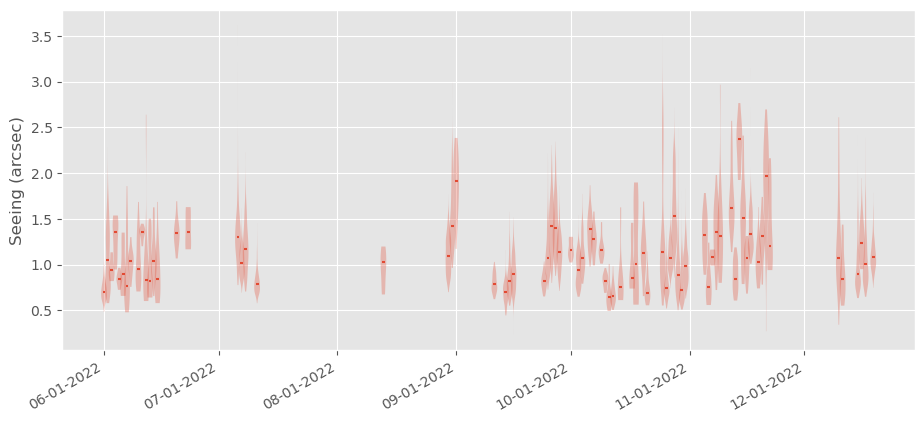

In [21]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2022_2ndhalf_violin.png")
    plt.show()

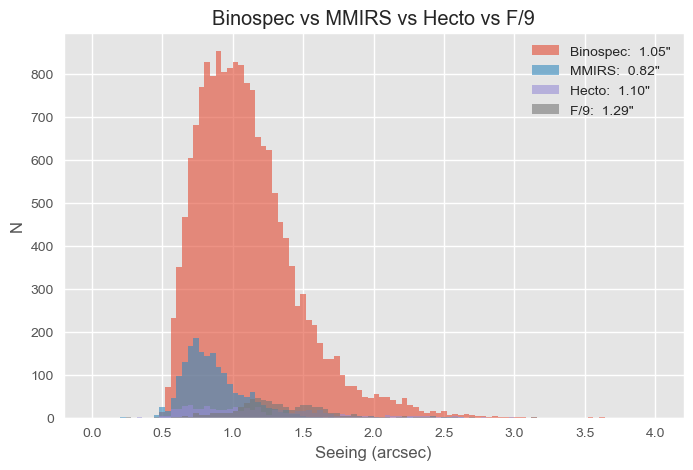

In [22]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8, 5))
    medb = np.median(fixed['seeing'][fixed['wfs'] == 'binospec'])
    medm = np.median(fixed['seeing'][fixed['wfs'] == 'mmirs'])
    medf = np.median(fixed['seeing'][fixed['wfs'] == 'f5'])
    medn = np.median(fixed['seeing'][fixed['wfs'] == 'newf9'])
    plt.hist(fixed['seeing'][fixed['wfs'] == 'binospec'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"Binospec: {medb: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'mmirs'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"MMIRS: {medm: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'f5'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"Hecto: {medf: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'newf9'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"F/9: {medn: .2f}\"")
    plt.legend()
    plt.title("Binospec vs MMIRS vs Hecto vs F/9")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.savefig("bino_vs_mmirs_2022_2ndhalf.png")
plt.show()

In [23]:
from minicyclop.io import read_seeing_data

In [24]:
cyclop = read_seeing_data(Path.home() / "MMT/minicyclop/data/MiniCyclop/Data/Seeing_Data.txt")

In [25]:
cyclop

,UT,flux,seeing,r0,isot,epoch_ms
ut,,,,,,
2022-06-08 03:32:32,6/8/2022 3:32:32 AM,2733.7,0.84,135.8,2022-06-08T03:32:32.968,1654659152968
2022-06-08 03:33:27,6/8/2022 3:33:27 AM,2755.7,0.84,134.4,2022-06-08T03:33:27.409,1654659207408
2022-06-08 03:34:23,6/8/2022 3:34:23 AM,2801.6,2.38,47.7,2022-06-08T03:34:23.655,1654659263655
2022-06-08 03:35:16,6/8/2022 3:35:16 AM,2853.2,1.01,112.3,2022-06-08T03:35:16.325,1654659316324
2022-06-08 03:36:00,6/8/2022 3:36:00 AM,2739.0,1.03,110.7,2022-06-08T03:36:00.691,1654659360691
...,...,...,...,...,...,...
2022-12-19 13:52:41,12/19/2022 1:52:41 PM,1398.1,1.03,110.1,2022-12-19T13:52:41.604,1671457961603
2022-12-19 13:53:31,12/19/2022 1:53:31 PM,1387.1,1.01,112.8,2022-12-19T13:53:31.793,1671458011793
2022-12-19 13:54:22,12/19/2022 1:54:22 PM,1411.6,1.11,102.4,2022-12-19T13:54:22.380,1671458062380


0.5283831493211327 0.4060710040909825 0.6982737820533361


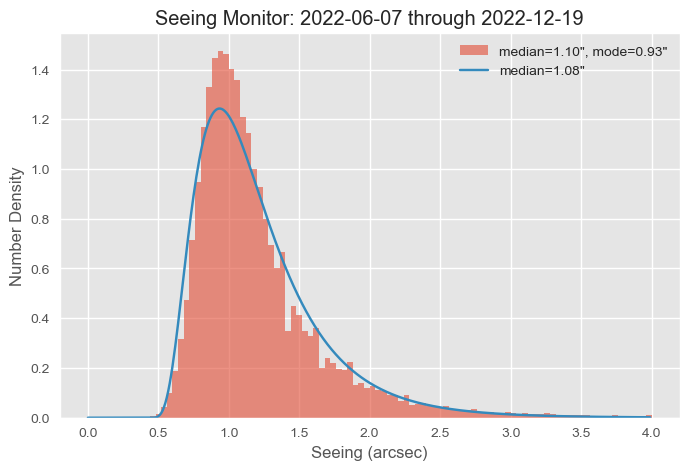

In [26]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(cyclop['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(cyclop['seeing'])
fit_median = exp_mu + loc

# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(cyclop['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("Seeing Monitor: 2022-06-07 through 2022-12-19")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2022_cyclop_hist.png")
plt.show()

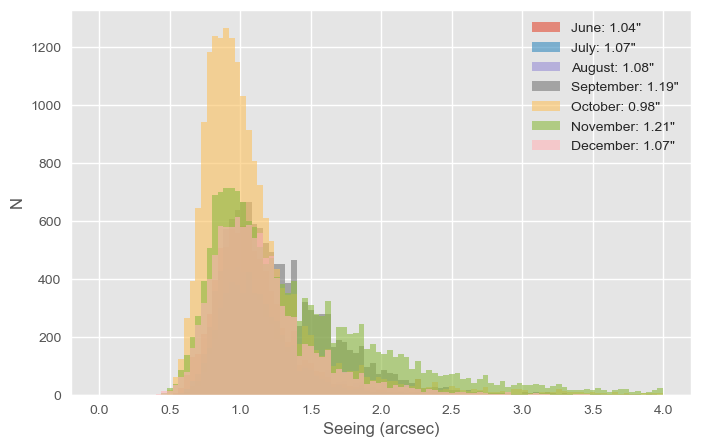

In [27]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
cyc_months = {}
legends = []
cyc_months['June'] = cyclop.loc['2022-06']
cyc_months['July'] = cyclop.loc['2022-07']
cyc_months['August'] = cyclop.loc['2022-08']
cyc_months['September'] = cyclop.loc['2022-09']
cyc_months['October'] = cyclop.loc['2022-10']
cyc_months['November'] = cyclop.loc['2022-11']
cyc_months['December'] = cyclop.loc['2022-12']
for m in months:
    plt.hist(cyc_months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(cyc_months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2022_cyclop_monthly.png")
plt.show()

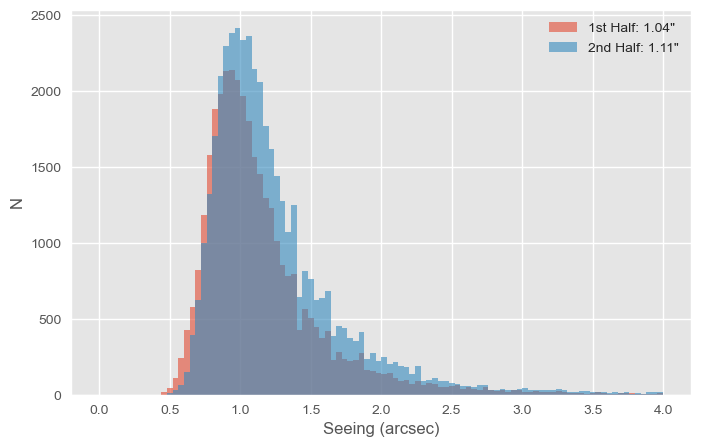

In [28]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = cyclop.between_time(start_time='00:00', end_time='07:00')
second_half = cyclop.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2022_cyclop_1st2nd.png")
plt.show()

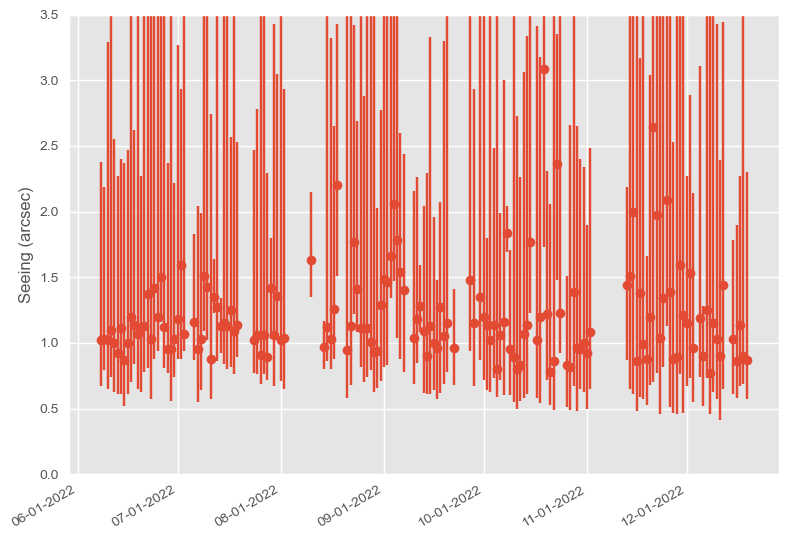

In [29]:
# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = cyclop.seeing.resample('D').median()
daily['max'] = cyclop.seeing.resample('D').max()
daily['min'] = cyclop.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2022_cyclop_nightly.png")
plt.show()

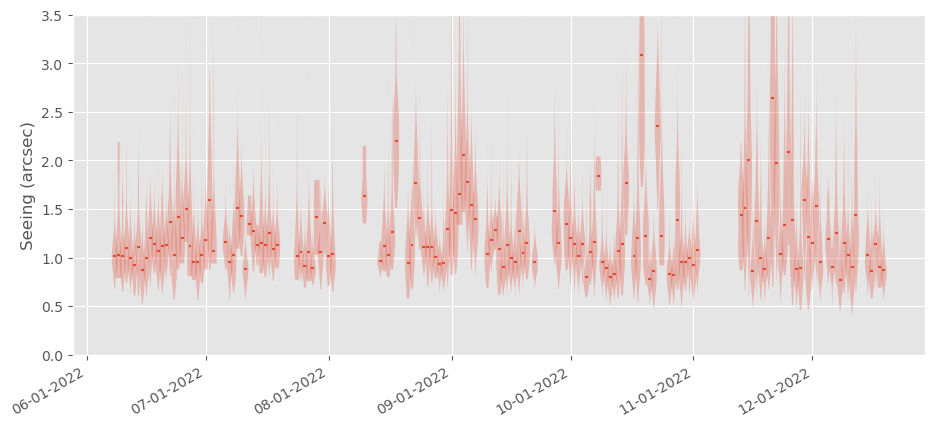

In [30]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(cyclop.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    ax.set_ylim(0.0, 3.5)
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2022_cyclop_violin.png")
    plt.show()

In [31]:
mmirs = fixed[fixed['wfs'] == 'mmirs']
bino = fixed[fixed['wfs'] == 'binospec']

In [32]:
mmirs_dates = sorted(list(set(mmirs.index.strftime('%Y-%m-%d'))))
bino_dates = sorted(list(set(bino.index.strftime('%Y-%m-%d'))))
mmirs_dates, bino_dates

(['2022-06-10',
  '2022-06-11',
  '2022-06-12',
  '2022-06-13',
  '2022-06-14',
  '2022-06-15',
  '2022-09-11',
  '2022-09-14',
  '2022-09-15',
  '2022-09-16'],
 ['2022-06-01',
  '2022-06-02',
  '2022-07-06',
  '2022-07-07',
  '2022-07-08',
  '2022-07-11',
  '2022-08-30',
  '2022-08-31',
  '2022-09-24',
  '2022-09-25',
  '2022-09-26',
  '2022-09-27',
  '2022-09-28',
  '2022-10-01',
  '2022-10-03',
  '2022-10-04',
  '2022-10-06',
  '2022-10-25',
  '2022-10-26',
  '2022-10-27',
  '2022-10-28',
  '2022-10-29',
  '2022-10-30',
  '2022-10-31',
  '2022-12-15',
  '2022-12-16',
  '2022-12-17',
  '2022-12-19'])

In [36]:
cyc_mmirs = []
for date in mmirs_dates:
    try:
        cyc = cyclop.loc[date]['seeing']
    except:
        continue
    cyc_mmirs.append(cyc)
cyc_mmirs = np.hstack(cyc_mmirs)

cyc_bino = []
for date in bino_dates:
    try:
        cyc = cyclop.loc[date]['seeing']
    except:
        continue
    cyc_bino.append(cyc)
cyc_bino = np.hstack(cyc_bino)

In [38]:
np.median(cyc_mmirs), np.median(cyc_bino)

(1.02, 1.02)

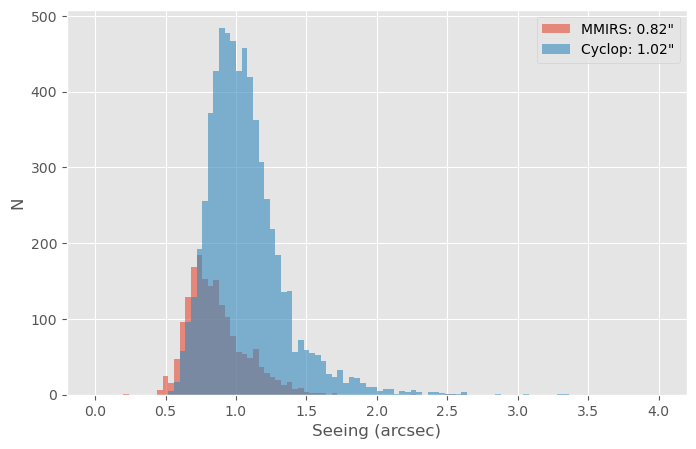

In [39]:
with plt.style.context('ggplot', after_reset=True):
    fig = plt.figure(figsize=(8, 5))
    plt.hist(mmirs['seeing'], bins=100, range=(0.0, 4.0), label="MMIRS", alpha=0.6)
    plt.hist(cyc_mmirs, bins=100, range=(0.0, 4.0), label="Cyclop", alpha=0.6)
    plt.legend(["MMIRS: %.2f\"" % np.median(mmirs['seeing']), "Cyclop: %.2f\"" % np.median(cyc_mmirs)])
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
    plt.savefig("2022_cyclop_mmirs.png")
    plt.show()

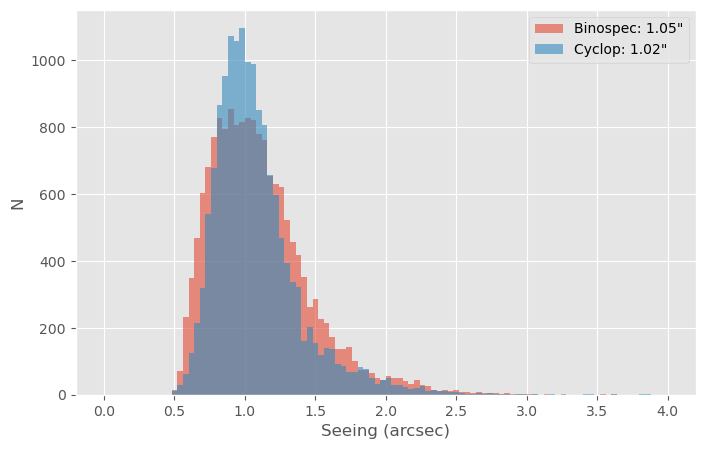

In [40]:
with plt.style.context('ggplot', after_reset=True):
    fig = plt.figure(figsize=(8, 5))
    plt.hist(bino['seeing'], bins=100, range=(0.0, 4.0), label="MMIRS", alpha=0.6)
    plt.hist(cyc_bino, bins=100, range=(0.0, 4.0), label="Cyclop", alpha=0.6)
    plt.legend(["Binospec: %.2f\"" % np.median(bino['seeing']), "Cyclop: %.2f\"" % np.median(cyc_bino)])
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
    plt.savefig("2022_cyclop_bino.png")
    plt.show()